# Artificial Neural Network

***ABSTRACT***

***In this hands-on practice we build a self-defined Neural Network from scratch by defining the parameters $\Theta$, the sigmoid function, derivative of sigmoid, cross-entropy  function, and performing all the calculations for Forward Propagation and Backpropagtion to train the neural network. We also collect the cost history data during the calculation and finally plot the cost convergence diagram to show how the process is going. We use the Churn_Modelling Dataset for the training of our neural network.***


## 1. Churn_Modelling Dataset

The Churn Modelling dataset contains customers information of a bank with a flag that s/he exits from the bank within 6 months. We will build an ANN to learn from the dataset and predict if a customer will leave the bank or not

### 1.1 Importing the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datafile = 'https://floobits.com/calvinlow18/ANN/raw/Churn_Modelling.csv'
dataset = pd.read_csv(datafile)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

#y shape looks like (m,), make it looks like (m,1)
y = y[:,np.newaxis]    


### 1.2 Encoding categorical data and Feature Scaling

Encode the country name (string)  and female/male (string) as One Hot Encoding.
Standard scaler other numeric data

Also need One Hot Encoding, see [Label Encoder vs. One Hot Encoder](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621)

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (OneHotEncoder(),[1,2]),
    (StandardScaler(),[0,3,4,5,6,7,8,9])
    #(MinMaxScaler(feature_range=(0, 1)),[0,3,4,5,6,7,8,9])
)

X = preprocess.fit_transform(X)

m = X.shape[0]
X = np.hstack((np.ones((m,1)), X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 1.3 Splitting the dataset into the Training set and Test set


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(8000, 14)
(2000, 14)
(8000, 1)
(2000, 1)


## 2. Build a Neural Network from scratch

![Neural Network Model](https://raw.githubusercontent.com/jchen8000/MachineLearning/master/images/NeuralNetwork.png)

### 2.1 Cross-Entropy Cost Function

> ## $ \min_\Theta J(\Theta)=-\frac{\mathrm{1} }{m} \sum_{i=1}^{m}  \sum_{k=1}^{K}\left[ y_k^{(i)} log((h_\Theta(x^{(i)}))_k) + (1 - y_k^{(i)}) log (1 - (h_\Theta(x^{(i)}))_k) \right]  + \frac{\mathrm{\lambda}}{2m}  \sum_{l=1}^{L-1} \sum_{i=1}^{S_l}\sum_{j=1}^{S_l+1}( \Theta_{ji}^{(l)})^2$

> Where $ h_\Theta(x)  \in  \mathbb{R}^K, (h_\Theta(x))_i = i^{th} output  $

> $ L = $ total no. of layers in neural network

> $ S_l = $ no. of units (not couning bias unit ) in layer $ l $

> ### Think of $ J(\Theta) \approx ( h_\Theta(x^{(i)}) - y^{(i)} ) ^2 $

### 2.2 Sigmoid Function and Derivative of Sigmoid

*  **Sigmoid Function:**
> ## $ g(z) = sigmoid(z) = \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }  $


*  **Derivative of Sigmoid Function:**
> ## $\frac{\mathrm{d} }{\mathrm{d} z}g(z) = g(z)(1-g(z)) $

### 2.3 Backpropagation

> ## $  \delta^{(3)}_j = a_j^{(3)} - y_j $,  ( total number of layers $ L = 3 $ )

> ## $  \delta^{(2)} = ( \Theta^{(2)} )^T  \delta^{(3)} .* g'(z^{(2)}) $

> ## $  \delta^{(1)} = ( \Theta^{(1)} )^T  \delta^{(2)} .* g'(z^{(1)}) $

In [0]:
class Neural_Network(object):
  def __init__(self, inputSize, hiddenSize, outputSize, lmbda):
  #parameters
    self.inputSize = inputSize
    self.outputSize = outputSize
    self.hiddenSize = hiddenSize
    self.lmbda = lmbda
    
  #weights
    epsilon = 0.2
    self.theta1 = np.random.randn(self.inputSize, self.hiddenSize)  * 2 * epsilon - epsilon
    self.theta2 = np.random.randn(self.hiddenSize, self.outputSize) * 2 * epsilon - epsilon
    #self.theta1 = np.random.rand(self.inputSize, self.hiddenSize) * 2 * epsilon - epsilon
    #self.theta2 = np.random.rand(self.hiddenSize, self.outputSize) * 2 * epsilon - epsilon
    
  #history
    self.loss_history =  [] 
    self.cost_history =  [] 

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.theta1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.theta2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

  def sigmoidDerivative(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propagate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidDerivative(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.theta2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidDerivative(self.z2) # applying derivative of sigmoid to z2 error

    self.theta1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.theta2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights
    
  def cost(self, X, y ):
    m = len(y)
    y_output = self.forward(X)
    
    c1 = np.multiply(y, np.log(y_output))
    c2 = np.multiply(1-y, np.log(1-y_output))
    c = np.sum(c1 + c2)
    
    r1 = np.sum(np.sum(np.power(self.theta1,2), axis = 1))
    r2 = np.sum(np.sum(np.power(self.theta2,2), axis = 1))
    
    return np.sum(c / (-m)) + (r1 + r2) * self.lmbda / (2*m)

  
  def loss(self, X, y):
    return np.mean(np.square(y - self.forward(X)))

  def train(self, X, y, epoch):
    for i in range(epoch):
      o = self.forward(X)
      self.backward(X, y, o)
      self.loss_history.append(self.loss(X,y))
      self.cost_history.append(self.cost(X,y))
      print("epoch:[", i, "], cost: ", str(self.cost(X,y))  )

  def predict(self, X):
    return self.forward(X)
  
  
  def get_cost_histroy(self):
    return self.cost_history
  
  def get_loss_histroy(self):
    return self.loss_history

  def get_weight(self):
    return self.theta1, self.theta2


In [0]:
#Plot the convergence of the cost function
def plotConvergence(cost_history, iterations):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(cost_history)),cost_history,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    dummy = plt.ylim([min(cost_history)-0.2*(max(cost_history)-min(cost_history)), max(cost_history)+0.2*(max(cost_history)-min(cost_history))])


In [8]:
NN = Neural_Network( inputSize=14, 
                     hiddenSize=3, 
                     outputSize=1, 
                     lmbda=1 )


iterations = 500
NN.train(X_train, y_train, iterations)


epoch:[ 0 ], cost:  63.940161140904564
epoch:[ 1 ], cost:  55.93949374659857
epoch:[ 2 ], cost:  55.08739698680884
epoch:[ 3 ], cost:  54.805348166389805
epoch:[ 4 ], cost:  53.83122566315066
epoch:[ 5 ], cost:  51.620583606707164
epoch:[ 6 ], cost:  49.29434003359889
epoch:[ 7 ], cost:  46.50756535977918
epoch:[ 8 ], cost:  45.80607169951079
epoch:[ 9 ], cost:  42.82180559521364
epoch:[ 10 ], cost:  40.95669874493696
epoch:[ 11 ], cost:  40.50161369111902
epoch:[ 12 ], cost:  39.295106645001006
epoch:[ 13 ], cost:  39.796575851396675
epoch:[ 14 ], cost:  38.61105041681028
epoch:[ 15 ], cost:  38.58100706605994
epoch:[ 16 ], cost:  36.36960372187005
epoch:[ 17 ], cost:  36.40401101375056
epoch:[ 18 ], cost:  35.80401181246204
epoch:[ 19 ], cost:  35.8666563660595
epoch:[ 20 ], cost:  35.76799149290531
epoch:[ 21 ], cost:  35.96168759513426
epoch:[ 22 ], cost:  35.48226044303727
epoch:[ 23 ], cost:  35.857342055703576
epoch:[ 24 ], cost:  35.83319649330391
epoch:[ 25 ], cost:  36.188743

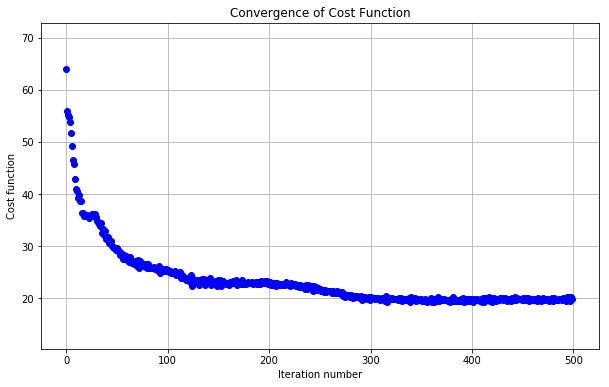

In [9]:
plotConvergence(NN.get_cost_histroy(),iterations )

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = NN.predict(X_test)
y_pred = (y_pred >= 0.5)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1553   42]
 [ 278  127]]

Accuracy Score: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      1595
           1       0.75      0.31      0.44       405

   micro avg       0.84      0.84      0.84      2000
   macro avg       0.80      0.64      0.67      2000
weighted avg       0.83      0.84      0.81      2000

